This notebook is designed to run in a Python environment having DAGMA package.

It is recommended to create a dedicated Conda environment for this notebook using the following command: conda create --name dagma python=3.x dagma

In [3]:
# !pip install dagma

In [4]:
# -*- coding: utf-8 -*-
import numpy as np
from utils.data.functions import (
    load_features,
    load_adjacency_matrix
)

import matplotlib.pyplot as plt
import time
from dagma import utils
from dagma.linear import DagmaLinear
# from dagma.nonlinear import DagmaMLP, DagmaNonlinear
import networkx as nx

c:\Users\m.amintoosi\.conda\envs\pth-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
time_start = time.time()
###### Settings ######
DATA_PATHS = {
    "shenzhen": {"feat": "data/sz_speed.csv", "adj": "data/sz_adj.csv"},
    "losloop": {"feat": "data/los_speed.csv", "adj": "data/los_adj.csv"},
}

time_start = time.time()
###### Settings ######
dataset_name = 'shenzhen' #'losloop'#'los'

###### load data ######
data = load_features(DATA_PATHS[dataset_name]["feat"])
adj = load_adjacency_matrix(DATA_PATHS[dataset_name]["adj"])

time_len = data.shape[0]
num_nodes = data.shape[1]
data1 =np.mat(data,dtype=np.float32)

#### normalization
max_value = np.max(data1)
data1 = data1/max_value

In [13]:
type(adj[0,0]), adj.shape, type(adj)

(numpy.float32, (156, 156), numpy.ndarray)

In [14]:
G = nx.from_numpy_array(adj, create_using=nx.DiGraph)

# Check if the graph is a DAG
is_dag = nx.is_directed_acyclic_graph(G)

print("The graph is a DAG:", is_dag)

The graph is a DAG: False


In [15]:
# # Draw the graph
# # pos = nx.spring_layout(G)  # positions for all nodes
# pos = nx.circular_layout(G)  # positions for all nodes
# nx.draw(G, pos, with_labels=True, node_size=70, node_color='skyblue', font_size=5, font_color='black', font_weight='bold', edge_color='gray')
# plt.show()


In [16]:
print(time_len, num_nodes)
print(data.shape, data1.shape)

2976 156
(2976, 156) (2976, 156)


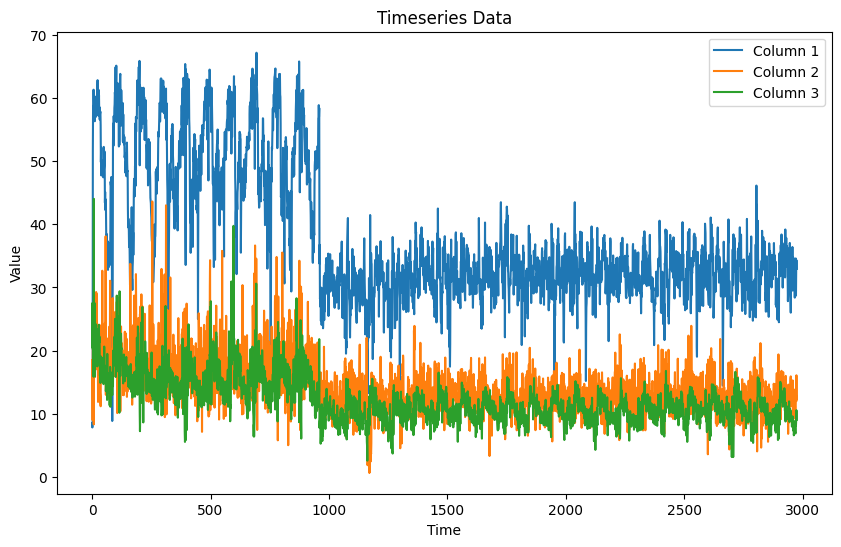

In [17]:
plt.figure(figsize=(10, 6))  # Set the figure size

for i in range(3):  
    plt.plot(data[:, i], label=f'Column {i+1}')  # Plot the column data with a label

plt.xlabel('Time')  # Set the x-axis label
plt.ylabel('Value')  # Set the y-axis label
plt.title('Timeseries Data')  # Set the title of the plot
plt.legend()  # Show the legend

plt.show()  # Show the plot


In [18]:
%%time
W_true = adj

pred_list = [1,2,3,4]
num_nodes = data.shape[1]
for pre_len in pred_list:
    W_est_all = np.zeros((num_nodes,num_nodes,pre_len))
    for i in range(pre_len):
        # X = data.values
        # Considering prediction length
        X = data[i::pre_len]
        model = DagmaLinear(loss_type='l2') # create a linear model with least squares loss
        w_est = model.fit(X, lambda1=0.02) # fit the model with L1 reg. (coeff. 0.02)
        W_est_all[:,:,i] = w_est

        acc = utils.count_accuracy(W_true, w_est > 0) # compute metrics of estimated adjacency matrix W_est with ground-truth
        print(pre_len, w_est.shape, acc, np.count_nonzero(w_est > 0))

    W_est_file_name = f"data/W_est_{dataset_name}_pre_len{pre_len}.npy"
    np.save(W_est_file_name, W_est_all)

100%|██████████| 180000/180000.0 [00:57<00:00, 3103.62it/s]


1 (156, 156) {'fdr': 0.22448979591836735, 'tpr': 1.0676691729323309, 'fpr': 0.0009517217511680222, 'shd': 240, 'nnz': 49} 49


100%|██████████| 180000/180000.0 [01:00<00:00, 2968.22it/s]


2 (156, 156) {'fdr': 0.288135593220339, 'tpr': 1.0751879699248121, 'fpr': 0.0014708427063505798, 'shd': 242, 'nnz': 59} 59


100%|██████████| 180000/180000.0 [01:00<00:00, 2985.23it/s] 


2 (156, 156) {'fdr': 0.23728813559322035, 'tpr': 1.080827067669173, 'fpr': 0.001211282228759301, 'shd': 236, 'nnz': 59} 59


100%|██████████| 180000/180000.0 [00:59<00:00, 3011.48it/s]


3 (156, 156) {'fdr': 0.3698630136986301, 'tpr': 1.0827067669172932, 'fpr': 0.0023360442983215088, 'shd': 248, 'nnz': 73} 73


100%|██████████| 180000/180000.0 [00:59<00:00, 3014.52it/s]


3 (156, 156) {'fdr': 0.36363636363636365, 'tpr': 1.0883458646616542, 'fpr': 0.002422564457518602, 'shd': 246, 'nnz': 77} 77


100%|██████████| 180000/180000.0 [00:57<00:00, 3147.75it/s]


3 (156, 156) {'fdr': 0.44047619047619047, 'tpr': 1.0845864661654134, 'fpr': 0.003201245890292438, 'shd': 257, 'nnz': 84} 84


100%|██████████| 180000/180000.0 [00:59<00:00, 3017.30it/s] 


4 (156, 156) {'fdr': 0.49056603773584906, 'tpr': 1.0977443609022557, 'fpr': 0.004499048278248832, 'shd': 265, 'nnz': 106} 106


100%|██████████| 180000/180000.0 [01:02<00:00, 2901.98it/s]


4 (156, 156) {'fdr': 0.43434343434343436, 'tpr': 1.1015037593984962, 'fpr': 0.0037203668454749957, 'shd': 254, 'nnz': 99} 99


100%|██████████| 180000/180000.0 [00:57<00:00, 3139.64it/s]


4 (156, 156) {'fdr': 0.46, 'tpr': 1.0977443609022557, 'fpr': 0.0039799273230662745, 'shd': 258, 'nnz': 100} 100


100%|██████████| 180000/180000.0 [00:58<00:00, 3087.81it/s]

4 (156, 156) {'fdr': 0.4673913043478261, 'tpr': 1.0883458646616542, 'fpr': 0.0037203668454749957, 'shd': 261, 'nnz': 92} 92
CPU times: total: 19min 7s
Wall time: 9min 53s


In [ ]:
adj_all = np.zeros(W_est_all.shape, dtype=int)
# Update values in adj based on the condition
adj_all[W_est_all > 0] = 1
adj = np.any(adj_all, axis=2)
W_est = adj.astype(int)
print('adj.shape=', adj.shape, type(adj[0,0]))
W_est_file_name = f"data/W_est_{dataset_name}_pre_len{pre_len}.npy"
np.save(W_est_file_name, W_est_all)

adj.shape= (156, 156) <class 'numpy.bool_'>


The saved W_est will be loaded in main.py

In [ ]:
pre_len = 1
W_est_file_name = f"data/W_est_{dataset_name}_pre_len{pre_len}.npy"
W_est_all = np.load(W_est_file_name)
W_est_all.shape

(156, 156, 1)

In [19]:
adj_matrix = W_est_all[:,:,0]
dag = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

# Check if the graph is a DAG
is_dag = nx.is_directed_acyclic_graph(dag)

print("The graph is a DAG:", is_dag)

The graph is a DAG: True


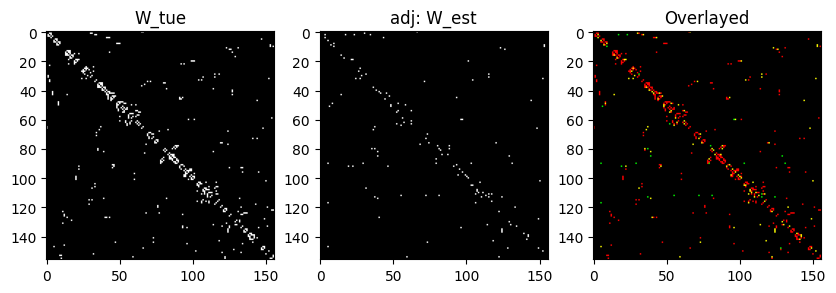

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(W_true.astype(np.uint8), cmap='gray')
axs[0].set_title('W_tue')

axs[1].imshow(W_est, cmap='gray')
axs[1].set_title('adj: W_est')

overlay_image = np.zeros((W_true.shape[0], W_true.shape[1], 3), dtype=np.uint8)
overlay_image[..., 0] = W_true * 255  # Red channel
overlay_image[..., 1] = W_est * 255   # Green channel

axs[2].imshow(overlay_image)
axs[2].set_title('Overlayed')

plt.show()